In [67]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [68]:
data = scipy.io.loadmat('plot.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 's_emle', 'q_core_emle', 'q_val_emle', 'alpha_species', 'z', 's_qm', 'q_core_qm', 'q_val_qm', 'alpha_qm', 'alpha_reference'])

In [ ]:
z_mask= data["z"] > 0
s_emle = data["s_emle"][z_mask]
q_core_emle = data["q_core_emle"][z_mask]
q_val_emle = data["q_val_emle"][z_mask]
alpha_species = data["alpha_species"].flatten()

s_qm = data["s_qm"][z_mask]
q_core_qm = data["q_core_qm"][z_mask]
q_val_qm = data["q_val_qm"][z_mask]
alpha_qm = data["alpha_qm"]

<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:97: SyntaxWarning: invalid escape sequence '\ '
<>:98: SyntaxWarning: invalid escape sequence '\ '
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:97: SyntaxWarning: invalid escape sequence '\ '
<>:98: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_2194412/2698324145.py:32: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_xlabel("$s_{\mathrm{EMLE}}\ (a_0)$")
/tmp/ipykernel_2194412/2698324145.py:33: SyntaxW

RMSE =  0.0020094596385346894
MSE =  -7.472242262797409e-07
RMSE =  0.006115708940677844
MSE =  -2.603330013278293e-16
RMSE =  0.018612544615806893
MSE =  2.6055374155866306e-16
RMSE =  3.149418858788974
MSE =  -0.17662258656465074


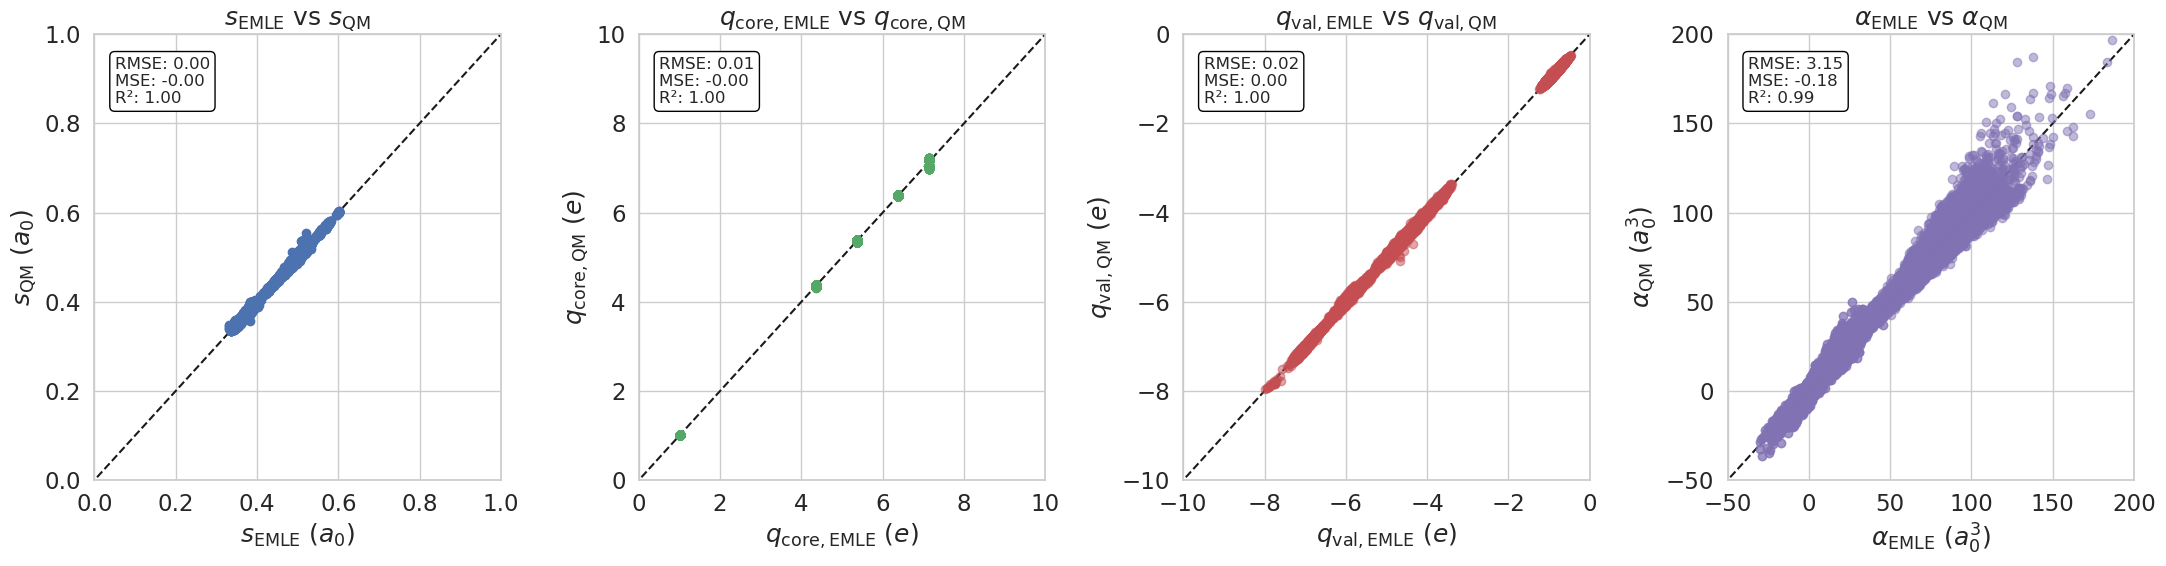

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid", font_scale=1.5)

# Function to compute RMSE, MSE, and R^2
def compute_metrics(true_values, predicted_values):
    mse = np.mean(true_values - predicted_values)
    rmse = np.sqrt(np.mean((true_values - predicted_values) ** 2))
    r2 = r2_score(true_values, predicted_values)
    print("RMSE = ", rmse)
    print("MSE = ", mse)
    
    return rmse, mse, r2

# Create the figure and axes for 3 subplots
fig, axes = plt.subplots(1, 4, figsize=(22, 6))

# Define the x values for the plot (reference line)
x = np.linspace(-1000, 1000, 100)
y = x

# Set limits for all subplots and plot reference line

for ax in axes:
    ax.plot(x, y, "k--", label="Reference Line")

# Scatter Plot 1: s_emle vs s_qm
rmse_s, mse_s, r2_s = compute_metrics(s_emle, s_qm)
axes[0].plot(s_emle, s_qm, "bo", label="s_emle vs s_qm")
axes[0].set_xlabel("$s_{\mathrm{EMLE}}\ (a_0)$")
axes[0].set_ylabel("$s_{\mathrm{QM}}\ (a_0)$")
axes[0].set_title(r'$s_{\mathrm{EMLE}}$ vs $s_{\mathrm{QM}}$')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)

# Display RMSE, MSE, R^2 on the plot
axes[0].text(
    0.05,
    0.95,
    f"RMSE: {rmse_s:.2f}\nMSE: {mse_s:.2f}\nR²: {r2_s:.2f}",
    transform=axes[0].transAxes,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
)

# Scatter Plot 2: q_core_emle vs q_core_qm
rmse_core, mse_core, r2_core = compute_metrics(q_core_emle, q_core_qm)
axes[1].plot(q_core_emle, q_core_qm, "go", label="q_core_emle vs q_core_qm")
axes[1].set_xlabel("$q_{\mathrm{core, EMLE}}\ (e)$")
axes[1].set_ylabel("$q_{\mathrm{core, QM}}\ (e)$")
axes[1].set_title(r'$q_{\mathrm{core, EMLE}}$ vs $q_{\mathrm{core, QM}}$')
axes[1].set_xlim(0, 10)
axes[1].set_ylim(0, 10)

# Display RMSE, MSE, R^2 on the plot
axes[1].text(
    0.05,
    0.95,
    f"RMSE: {rmse_core:.2f}\nMSE: {mse_core:.2f}\nR²: {r2_core:.2f}",
    transform=axes[1].transAxes,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
)

# Scatter Plot 3: q_val_emle vs q_val_qm
rmse_val, mse_val, r2_val = compute_metrics(q_val_emle, q_val_qm)
axes[2].plot(q_val_emle, q_val_qm, "ro", label="q_val_emle vs q_val_qm", alpha=0.5)
axes[2].set_xlabel("$q_{\mathrm{val, EMLE}}\ (e)$")
axes[2].set_ylabel("$q_{\mathrm{val, QM}}\ (e)$")
axes[2].set_title(r'$q_{\mathrm{val, EMLE}}$ vs $q_{\mathrm{val, QM}}$')
axes[2].set_xlim(-10, 0)
axes[2].set_ylim(-10, 0)

# Display RMSE, MSE, R^2 on the plot
axes[2].text(
    0.05,
    0.95,
    f"RMSE: {rmse_val:.2f}\nMSE: {mse_val:.2f}\nR²: {r2_val:.2f}",
    transform=axes[2].transAxes,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
)

# Scatter Plot 4: alpha_species vs alpha_qm
alpha_species_flat = alpha_species.flatten()
alpha_qm_flat = alpha_qm.flatten()
rmse_alpha, mse_alpha, r2_alpha = compute_metrics(alpha_species_flat, alpha_qm_flat)
axes[3].plot(alpha_species_flat, alpha_qm_flat, "mo", label="alpha_species vs alpha_qm", alpha=0.5)
axes[3].set_xlabel("$\\alpha_{\\mathrm{EMLE}}\ (a_0^3)$")
axes[3].set_ylabel("$\\alpha_{\\mathrm{QM}}\ (a_0^3)$")
axes[3].set_title(r'$\alpha_{\mathrm{EMLE}}$ vs $\alpha_{\mathrm{QM}}$')
axes[3].set_xlim(-50, 200)
axes[3].set_ylim(-50, 200)

# Display RMSE, MSE, R^2 on the plot
axes[3].text(
    0.05,
    0.95,
    f"RMSE: {rmse_alpha:.2f}\nMSE: {mse_alpha:.2f}\nR²: {r2_alpha:.2f}",
    transform=axes[3].transAxes,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
)

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()